**Rocks Classifictions**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import important library and Function**

In [ ]:
# !pip install pandas
# !pip install seaborn
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2

import seaborn as sns
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

**Define function for deleting Corupted Image**

In [ ]:
def del_corupted_images(filename):
                 del_count = 0
                 if os.path.isfile(filename):
                    try:
                        fobj = open(filename,'rb')
                        is_JFIF =  b'JFIF' in fobj.peek(10)
                    finally:
                        fobj.close()
                    if not is_JFIF:
                        del_count += 1
                 return del_count

**Delete the Image Repeated Exactly**

In [ ]:
import hashlib

def del_shw_RepIm(path):
            os.chdir(path)
            files_list = os.listdir()
            duplicates = []
            hash_keys = dict()
            for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
                 if os.path.isfile(filename):
                    with open(filename, 'rb') as f:
                        filehash = hashlib.md5(f.read()).hexdigest()

                    if filehash not in hash_keys:
                        hash_keys[filehash] = index
                        if del_corupted_images(path+'/'+ filename) != 1 :
                            filepaths.append(path +'/'+ filename)
                            labels.append(lab)
                    else:
                         duplicates.append((index,hash_keys[filehash]))

            for file_indexes in duplicates:
                     try:

                         plt.subplot(121),plt.imshow(plt.imread(files_list[file_indexes[1]]))
                         plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

                         plt.subplot(122),plt.imshow(plt.imread(files_list[file_indexes[0]]))
                         plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
                         plt.show()

                     except OSError as e:
                        print(error)
                        continue

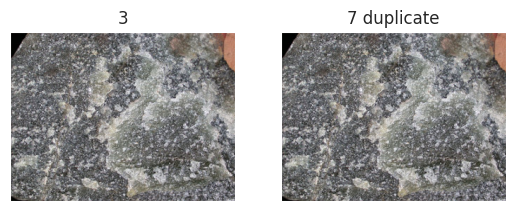

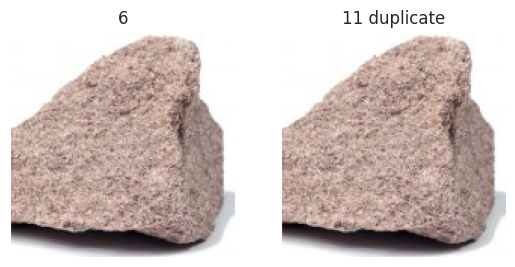

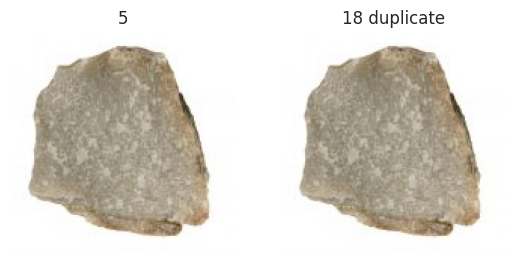

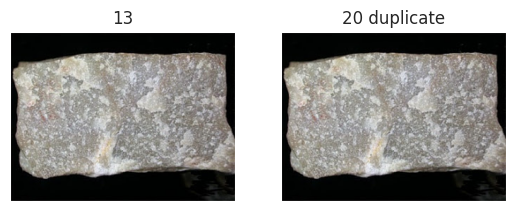

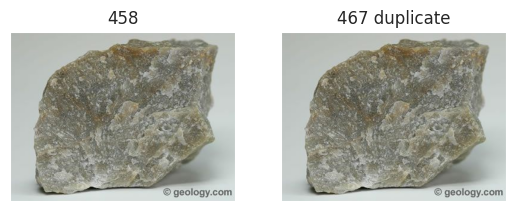

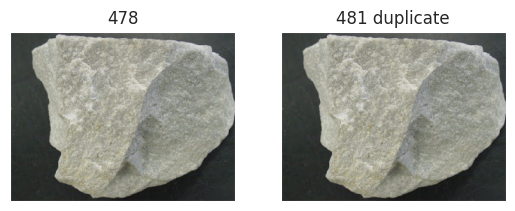

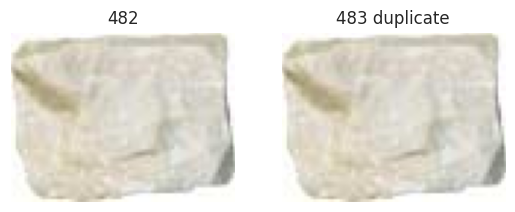

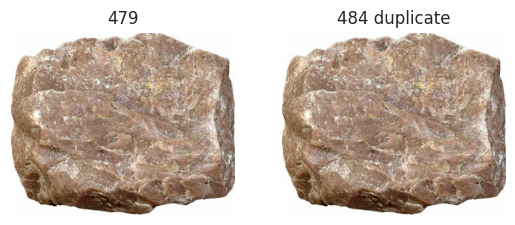

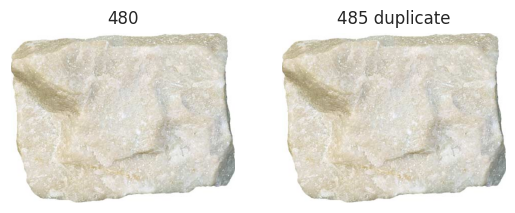

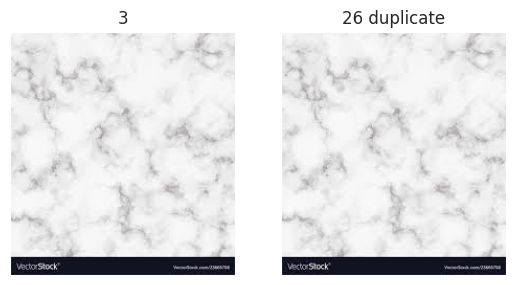

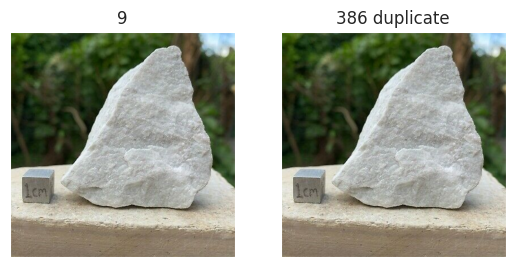

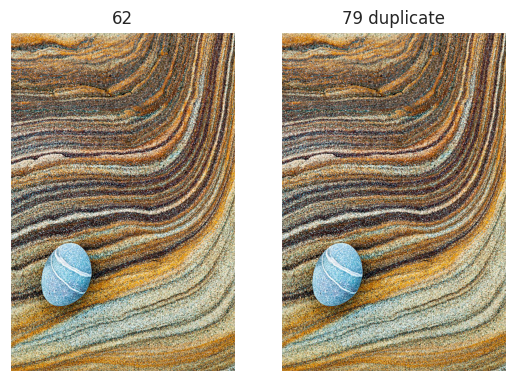

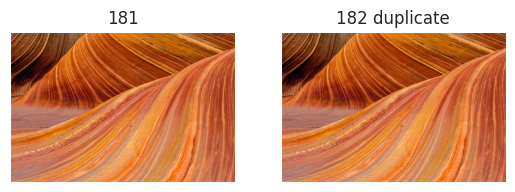

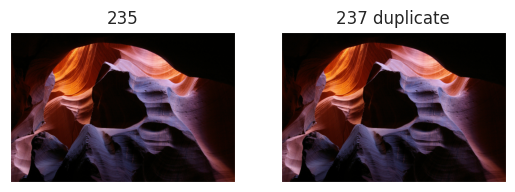

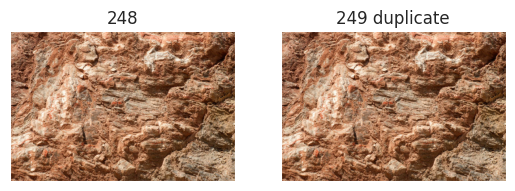

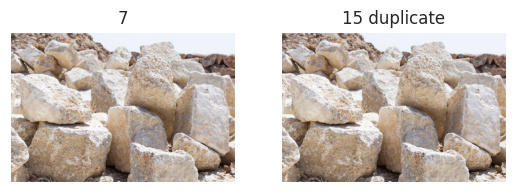

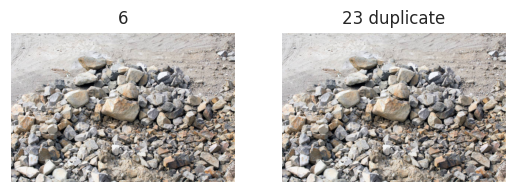

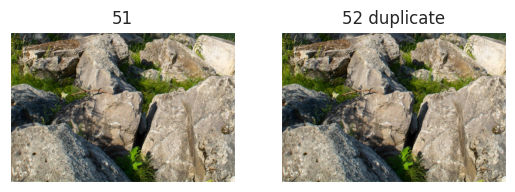

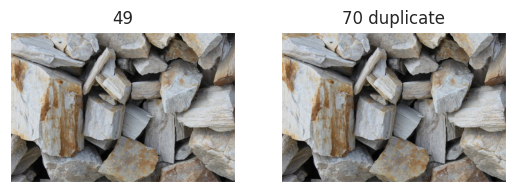

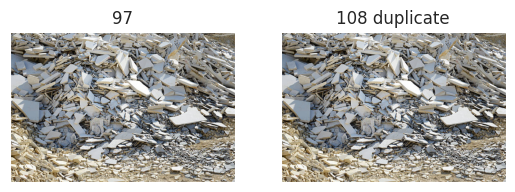

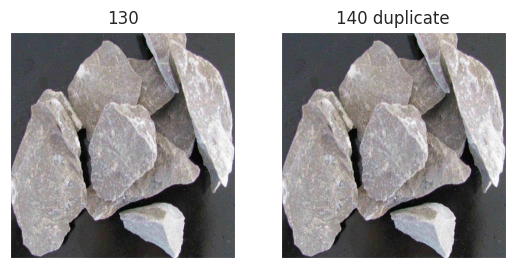

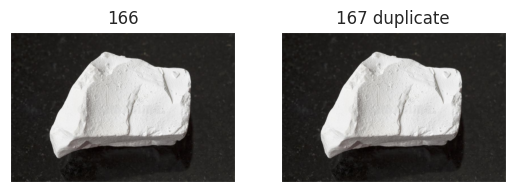

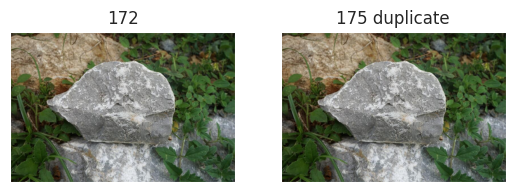

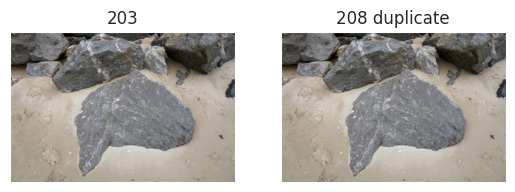

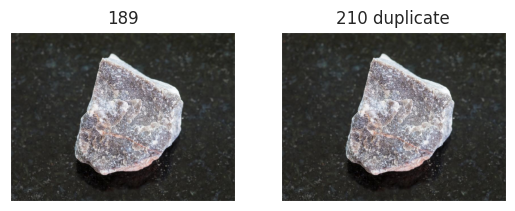

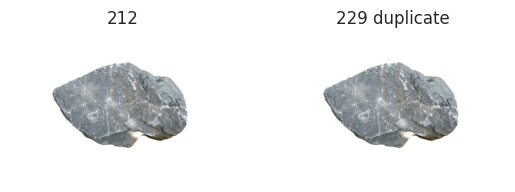

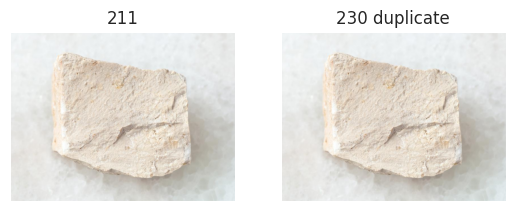

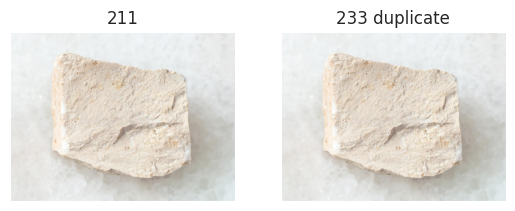

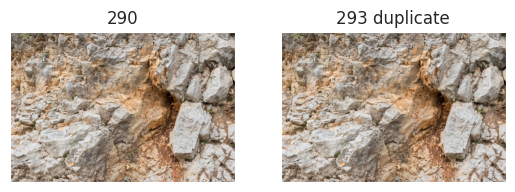

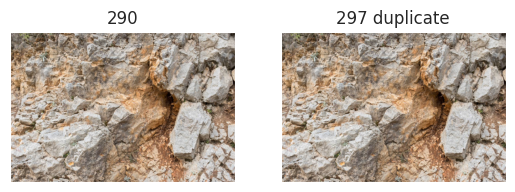

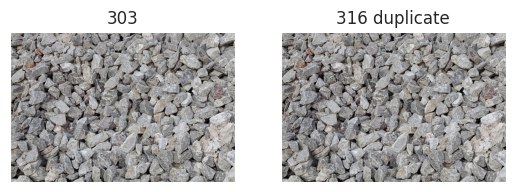

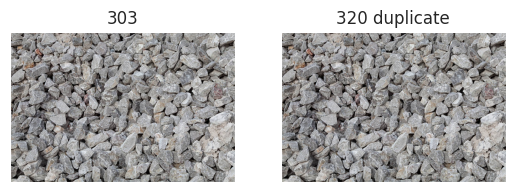

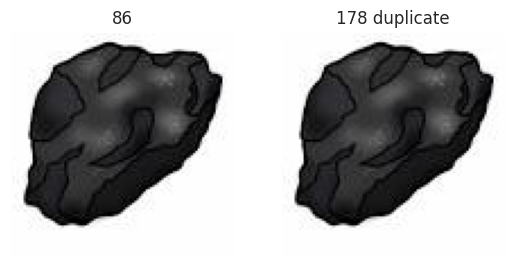

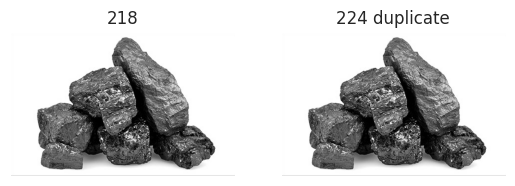

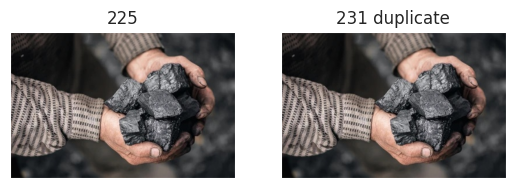

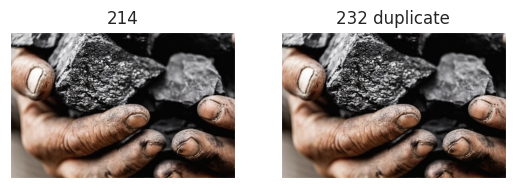

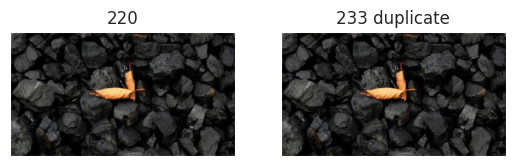

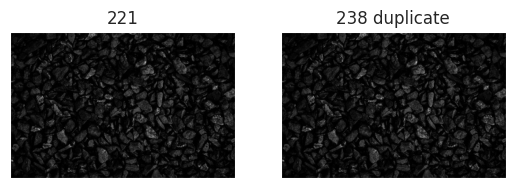

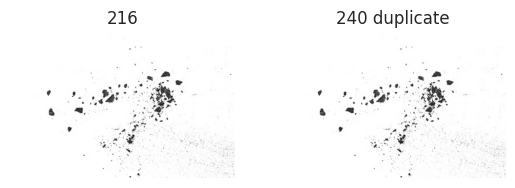

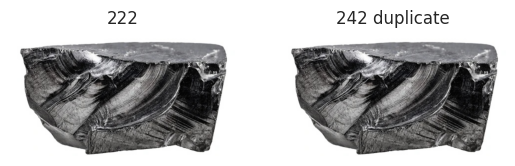

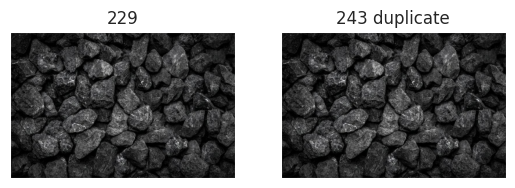

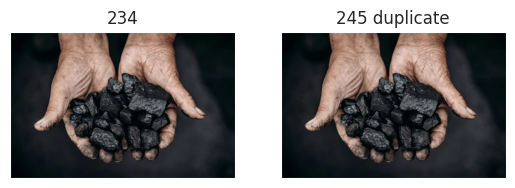

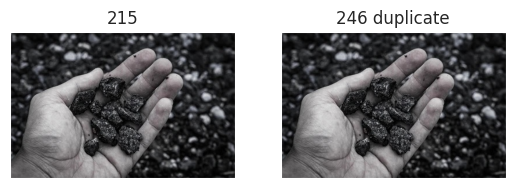

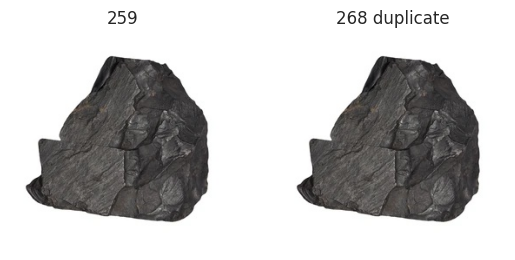

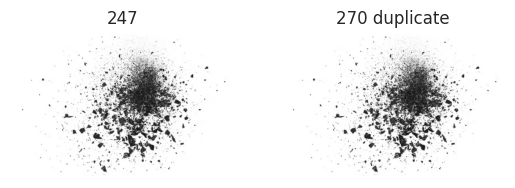

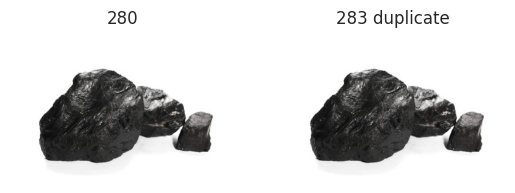

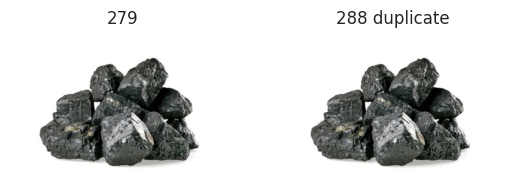

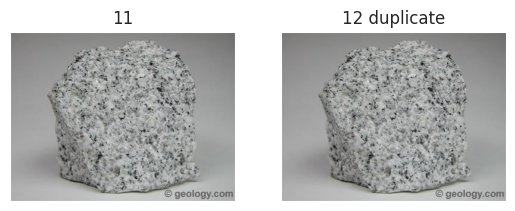

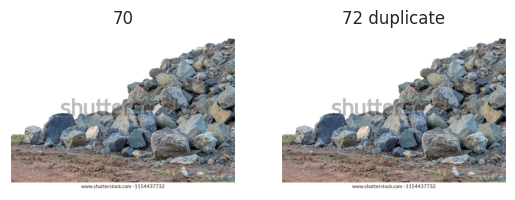

In [ ]:
path=r'/content/drive/MyDrive/Dataset/Dataset'
filepaths=[]
labels=[]

for sub_path in os.listdir(path):
        for lab in os.listdir(path+'/'+sub_path):
             del_shw_RepIm(path+'/'+sub_path+'/'+lab)

In [ ]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))
pd.Series(labels).value_counts()

filepaths:  1916    labels:  1916


Quartzite    473
Marble       383
Coal         349
Sandstone    317
Limestone    257
Basalt        72
Granite       65
dtype: int64

**Delete duplicated images use CNN from imagededup**

In [ ]:
!pip install imagededup
!pip install wheel
# please note this package - imagededup was custom-installed in this kernel

from imagededup.methods import CNN
from imagededup.utils import plot_duplicates
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)

In [ ]:
cnn = CNN()

2024-03-27 04:04:16,801: INFO Device set to cuda ..
INFO:imagededup.methods.cnn:Device set to cuda ..
2024-03-27 04:04:17,036: INFO Initialized: mobilenet_v3_small for feature extraction ..
INFO:imagededup.methods.cnn:Initialized: mobilenet_v3_small for feature extraction ..


In [ ]:
for sub_path in os.listdir(path):
        for lab in os.listdir(path+'/'+sub_path):
                dir=path+'/'+sub_path+'/'+lab
                encodings = cnn.encode_images(image_dir=dir)
                duplicate = cnn.find_duplicates_to_remove(image_dir=dir,min_similarity_threshold=0.9499)
                for indx , path_img in enumerate(filepaths):
                    if path_img.split('/')[-2] == lab :
                          for  namImg in duplicate :
                                 if dir+'/'+namImg == path_img:
                                    filepaths.pop(indx )
                                    labels.pop(indx )

2024-03-27 04:04:17,054: INFO Start: Image encoding generation
INFO:imagededup.methods.cnn:Start: Image encoding generation
2024-03-27 04:04:22,235: INFO End: Image encoding generation
INFO:imagededup.methods.cnn:End: Image encoding generation
2024-03-27 04:04:22,248: INFO Start: Image encoding generation
INFO:imagededup.methods.cnn:Start: Image encoding generation
2024-03-27 04:04:26,959: INFO End: Image encoding generation
INFO:imagededup.methods.cnn:End: Image encoding generation
2024-03-27 04:04:26,998: INFO Start: Calculating cosine similarities...
INFO:imagededup.methods.cnn:Start: Calculating cosine similarities...
2024-03-27 04:04:27,014: INFO End: Calculating cosine similarities.
INFO:imagededup.methods.cnn:End: Calculating cosine similarities.
2024-03-27 04:04:27,041: INFO Start: Image encoding generation
INFO:imagededup.methods.cnn:Start: Image encoding generation
2024-03-27 04:04:35,363: INFO End: Image encoding generation
INFO:imagededup.methods.cnn:End: Image encoding gen

In [ ]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  1860    labels:  1860


**Save the paths of images in data frame**

In [ ]:
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)

balance=df['labels'].value_counts()
print (balance)

Quartzite    468
Marble       375
Coal         323
Sandstone    312
Limestone    246
Basalt        71
Granite       65
Name: labels, dtype: int64


**Create file to save augement Image**

In [ ]:
pth= r'/content/drive/MyDrive/Result'
os.chdir(r'/content/drive/MyDrive/Dataset')
if os.path.isfile(pth) == 0:
    os.mkdir(pth)

FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/Result'

**Create new foder for 7 classes**

In [ ]:
classes = ['Basalt' ,'Granite' , 'Marble' ,'Quartzite'  , 'Coal'  , 'Sandstone' , 'Limestone']
for cls in classes:
    if os.path.isfile(pth+'/'+cls) == 0 :
        os.mkdir(pth+'/'+cls)

FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/Result/Basalt'

**Delete the content for every classes**

In [ ]:
for cls in classes:
    if os.path.isfile(pth+'/'+cls) == 0 :
        shutil.rmtree(pth+'/'+cls)

In [ ]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  1860    labels:  1860


**Copy image after delete Corupted , Repeated and duplicated images**

In [ ]:
# import os
# import shutil

# src_path = r"/content/drive/MyDrive/Dataset"
# dst_path = r"/content/drive/MyDrive/Result"



# # Move each jpg file to the destination directory
# for file in filepaths:
#     x = file.split('/')[-2:]
#     shutil.copy(file , os.path.join(dst_path,x[0]+'/'+x[1]))


# Import necessary modules
import os
import shutil

# Define source and destination paths
src_path = r"/content/drive/MyDrive/Dataset"
dst_path = r"/content/drive/MyDrive/Result"

# Ensure destination directory exists
os.makedirs(dst_path, exist_ok=True)

# Move each jpg file to the destination directory
for file in filepaths:
    # Split the file path to get the class and file name
    cls, filename = file.split('/')[-2:]

    # Create the destination directory for the class if it doesn't exist
    class_dir = os.path.join(dst_path, cls)
    os.makedirs(class_dir, exist_ok=True)

    # Copy the file to the destination directory
    shutil.copy(file, os.path.join(dst_path, cls, filename))


**Load training and validation sets and make augmentation**

In [ ]:
# Load training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dst_path,validation_split=0.2,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dst_path,validation_split=0.2,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    valid_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 1854 files belonging to 7 classes.
Using 1484 files for training.
Found 1854 files belonging to 7 classes.
Using 370 files for validation.


**Bulid the model**

**VGG Model**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define VGG-16 architecture
vgg_model = Sequential([
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
vgg_model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
epochs = 50
history = vgg_model.fit(ds_train, validation_data=ds_valid, epochs=epochs, callbacks=[early_stopping])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [ ]:
# Evaluate the model on the validation dataset
_, accuracy = vgg_model.evaluate(ds_valid)
print('Validation Accuracy:', accuracy)

6/6 [==============================] - 1s 224ms/step - loss: 1.6498 - accuracy: 0.1568
Validation Accuracy: 0.15675675868988037


**AlexNet Model**

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# Define AlexNet architecture
alexnet_model = Sequential([
    Rescaling(1./255, input_shape=(224, 224, 3)),
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
alexnet_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
epochs = 50
history = alexnet_model.fit(ds_train, validation_data=ds_valid, epochs=epochs, callbacks=[early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 384)      

In [ ]:
_, accuracy = alexnet_model.evaluate(ds_valid)
print('Validation Accuracy:', accuracy)

6/6 [==============================] - 0s 41ms/step - loss: 1.6537 - accuracy: 0.1568
Validation Accuracy: 0.15675675868988037


**LENET Model**

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2

import seaborn as sns
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory

sns.set_style('darkgrid')

# Define LeNet-5 architecture
lenet_model = Sequential([
    Rescaling(1./255, input_shape=(224, 224, 3)),
    Conv2D(6, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 classes in your dataset
])

# Compile the model
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
lenet_model.summary()

# Train the model
epochs = 50
history = lenet_model.fit(ds_train, validation_data=ds_valid, epochs=epochs)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 average_pooling2d (Average  (None, 110, 110, 6)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 53, 53, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 44944)            

In [ ]:
accuracy = lenet_model.evaluate(ds_valid)[1]
print('Validation Accuracy:', accuracy)

6/6 [==============================] - 0s 22ms/step - loss: 1.3167 - accuracy: 0.5757
Validation Accuracy: 0.5756756663322449


**CNN Model**

In [ ]:
model = Sequential()
model.add(Rescaling(1./255 ,input_shape=(224,224,3)))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7 , activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 56, 56, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam' , metrics=['accuracy'])

In [ ]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]
hist = model.fit(train_ds,validation_data=valid_ds, epochs=50 , callbacks=mycallbacks )

Epoch 1/50
24/24 [==============================] - 19s 500ms/step - loss: 2.2919 - accuracy: 0.2803 - val_loss: 1.1286 - val_accuracy: 0.4892
Epoch 2/50
24/24 [==============================] - 13s 445ms/step - loss: 1.4611 - accuracy: 0.4515 - val_loss: 0.9555 - val_accuracy: 0.6027
Epoch 3/50
24/24 [==============================] - 14s 454ms/step - loss: 1.2863 - accuracy: 0.5290 - val_loss: 1.0665 - val_accuracy: 0.5811
Epoch 4/50
24/24 [==============================] - 14s 453ms/step - loss: 1.1805 - accuracy: 0.5768 - val_loss: 0.7819 - val_accuracy: 0.7324
Epoch 5/50
24/24 [==============================] - 14s 454ms/step - loss: 1.0924 - accuracy: 0.5950 - val_loss: 0.7150 - val_accuracy: 0.7541
Epoch 6/50
24/24 [==============================] - 14s 468ms/step - loss: 0.9875 - accuracy: 0.6462 - val_loss: 0.7008 - val_accuracy: 0.7297
Epoch 7/50
24/24 [==============================] - 14s 467ms/step - loss: 0.8497 - accuracy: 0.6840 - val_loss: 0.9134 - val_accuracy: 0.6676

**Evaluate the model**

In [ ]:
model.evaluate(valid_ds)

6/6 [==============================] - 3s 642ms/step - loss: 0.2685 - accuracy: 0.9216


[0.26849228143692017, 0.9216216206550598]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Flatten the images for KNN
x_train_knn, y_train_knn = [], []
for images, labels in ds_train:
    for image, label in zip(images, labels):
        x_train_knn.append(image.numpy().flatten())  # Flatten the image
        y_train_knn.append(label.numpy())  # Append the label

x_train_knn = np.array(x_train_knn)
y_train_knn = np.array(y_train_knn)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_knn, y_train_knn)

# Evaluate on validation data
x_valid_knn, y_valid_knn = [], []
for images, labels in ds_valid:
    for image, label in zip(images, labels):
        x_valid_knn.append(image.numpy().flatten())  # Flatten the image
        y_valid_knn.append(label.numpy())  # Append the label

x_valid_knn = np.array(x_valid_knn)
y_valid_knn = np.array(y_valid_knn)

accuracy_knn = knn.score(x_valid_knn, y_valid_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.4648648648648649
